In [7]:
import numpy as np
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [8]:
def BanditGenerator(i):
    if i in [0,1,2,3,4]:
        return np.random.normal(0, 1)
    if i in [5,6,7,8]:
        return np.random.normal(0.7,1)
    if i == 9:
        return np.random.normal(1.1,1)

def random_index_of_max(lst):
    max_val = max(lst)
    max_indices = [i for i, val in enumerate(lst) if val == max_val]
    if len(max_indices) == 1:
        return max_indices[0]
    else:
        return random.choice(max_indices)

def random_index_of_NOT_max(lst):
    max_val = max(lst)
    not_max_indices = [i for i, val in enumerate(lst) if val != max_val]
    if len(not_max_indices) == 1:
        return not_max_indices[0]
    else:
        return random.choice(not_max_indices)

def cumsum(lst):
    return list(accumulate(lst))

def divide_list(lst, divisor):
    return [num / divisor for num in lst]

def multiply_list(lst, multiplier):
    return [num * multiplier for num in lst]

In [9]:
#eps-greedy
Q = [0]*10
probabilities = [0.8, 0.2] # eps-greedy parameters

i_bandit = random.randint(0, 9)
print("Zaczynamy gre od bandyty numer: ", i_bandit)

optimal_bandit = 9
optimal_action_history = []
alfa = 0.1

probabilities = [0.1,0.9] 
N_GAMES = 1000
for number_plays in range(1,N_GAMES+1):
    print("Numer gry: ", number_plays)
    
    value_from_i_th_bandit = BanditGenerator(i_bandit)
    print(f"Gramy {i_bandit}-tym bandytom i otrzymujemy: ", value_from_i_th_bandit)
    
    Q[i_bandit]= Q[i_bandit]+alfa*(value_from_i_th_bandit-Q[i_bandit])
    print("nadpisane wagi:", Q)
    
    greedy_choice = np.random.choice([0, 1], p=probabilities)
    
    max_index = Q.index(max(Q))
    if greedy_choice:
        print("greedy choice")
        i_bandit = random_index_of_max(Q) 
    else:
        print("EXPLORATION choice")
        i_bandit = random_index_of_NOT_max(Q)
    print("\n")
    
    if i_bandit==optimal_bandit:
        optimal_action_history.append(1)
    else:
        optimal_action_history.append(0)
    

Zaczynamy gre od bandyty numer:  1
Numer gry:  1
Gramy 1-tym bandytom i otrzymujemy:  0.7417254140923233
nadpisane wagi: [0, 0.07417254140923234, 0, 0, 0, 0, 0, 0, 0, 0]
greedy choice


Numer gry:  2
Gramy 1-tym bandytom i otrzymujemy:  -0.8199612694874024
nadpisane wagi: [0, -0.015240839680431148, 0, 0, 0, 0, 0, 0, 0, 0]
greedy choice


Numer gry:  3
Gramy 5-tym bandytom i otrzymujemy:  0.8586171361172702
nadpisane wagi: [0, -0.015240839680431148, 0, 0, 0, 0.08586171361172702, 0, 0, 0, 0]
greedy choice


Numer gry:  4
Gramy 5-tym bandytom i otrzymujemy:  1.7492369906148306
nadpisane wagi: [0, -0.015240839680431148, 0, 0, 0, 0.2521992413120374, 0, 0, 0, 0]
greedy choice


Numer gry:  5
Gramy 5-tym bandytom i otrzymujemy:  0.7902817263135938
nadpisane wagi: [0, -0.015240839680431148, 0, 0, 0, 0.30600748981219306, 0, 0, 0, 0]
greedy choice


Numer gry:  6
Gramy 5-tym bandytom i otrzymujemy:  1.8995279017555713
nadpisane wagi: [0, -0.015240839680431148, 0, 0, 0, 0.46535953100653094, 0, 0,

In [10]:
cumsuma = cumsum(optimal_action_history)
divided_list = [num / (index + 1) for index, num in enumerate(cumsuma)]
percentge_list = multiply_list(divided_list,100)

In [40]:
#GREEDY
Q = [0]*10

i_bandit = random.randint(0, 9)
print("Zaczynamy gre od bandyty numer: ", i_bandit)

optimal_bandit = 9
optimal_action_history = []
alfa = 0.1

N_GAMES = 1000
for number_plays in range(1,N_GAMES+1):
    print("Numer gry: ", number_plays)
    
    value_from_i_th_bandit = BanditGenerator(i_bandit)
    print(f"Gramy {i_bandit}-tym bandytom i otrzymujemy: ", value_from_i_th_bandit)
    
    Q[i_bandit]= Q[i_bandit]+alfa*(value_from_i_th_bandit-Q[i_bandit])
    print("nadpisane wagi:", Q)
    
    max_index = Q.index(max(Q))
    i_bandit = random_index_of_max(Q)
    
    print("\n")
    
    if i_bandit==optimal_bandit:
        optimal_action_history.append(1)
    else:
        optimal_action_history.append(0)
    
cumsuma = cumsum(optimal_action_history)
divided_list = [num / (index + 1) for index, num in enumerate(cumsuma)]
percentge_list_GREEDY = multiply_list(divided_list,100)

Zaczynamy gre od bandyty numer:  1
Numer gry:  1
Gramy 1-tym bandytom i otrzymujemy:  -1.1440265733928174
nadpisane wagi: [0, -0.11440265733928175, 0, 0, 0, 0, 0, 0, 0, 0]


Numer gry:  2
Gramy 3-tym bandytom i otrzymujemy:  1.8554597574314247
nadpisane wagi: [0, -0.11440265733928175, 0, 0.18554597574314247, 0, 0, 0, 0, 0, 0]


Numer gry:  3
Gramy 3-tym bandytom i otrzymujemy:  0.5710259019488131
nadpisane wagi: [0, -0.11440265733928175, 0, 0.22409396836370954, 0, 0, 0, 0, 0, 0]


Numer gry:  4
Gramy 3-tym bandytom i otrzymujemy:  -0.4164324290283772
nadpisane wagi: [0, -0.11440265733928175, 0, 0.16004132862450088, 0, 0, 0, 0, 0, 0]


Numer gry:  5
Gramy 3-tym bandytom i otrzymujemy:  -1.6903991288344202
nadpisane wagi: [0, -0.11440265733928175, 0, -0.025002717121391238, 0, 0, 0, 0, 0, 0]


Numer gry:  6
Gramy 4-tym bandytom i otrzymujemy:  -0.7092345676591413
nadpisane wagi: [0, -0.11440265733928175, 0, -0.025002717121391238, -0.07092345676591413, 0, 0, 0, 0, 0]


Numer gry:  7
Gramy 

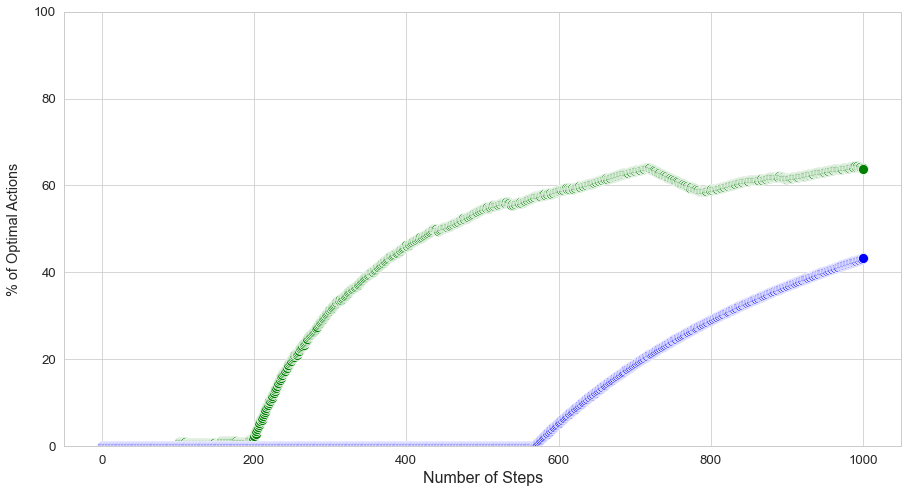

In [41]:
plt.figure(figsize=(15, 8))

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)


sns.lineplot(x=range(1, N_GAMES + 1), y=percentge_list, marker='o', linewidth=3, markersize=10,color='green')
sns.lineplot(x=range(1, N_GAMES + 1), y=percentge_list_GREEDY, marker='o', linewidth=3, markersize=10,color='blue')

plt.text(-0.06, 0.5, '% of Optimal Actions', ha='center', va='center', rotation='vertical', transform=plt.gca().transAxes)
plt.ylim(0, 100)
plt.xlabel('Number of Steps', fontsize=16)

plt.show()